<a href="https://colab.research.google.com/github/fasthill/ML-DL-study-alone/blob/main/5-2%20%EA%B5%90%EC%B0%A8%20%EA%B2%80%EC%A6%9D%EA%B3%BC%20%EA%B7%B8%EB%A6%AC%EB%93%9C%20%EC%84%9C%EC%B9%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 교차 검증과 그리드 서치

## 검증 세트

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import multiprocessing
import random

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from tensorflow import keras

AttributeError: module 'numpy' has no attribute 'typeDict'

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\tensorflow\python\framework\dtypes.py:511: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  np.object,


AttributeError: module 'numpy' has no attribute 'object'.
`np.object` was a deprecated alias for the builtin `object`. To avoid this error in existing code, use `object` by itself. Doing this will not modify any behavior and is safe. 
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

In [70]:
# 분석용 데이터 입력
directory_for_ml = '../data/data_for_ml/'
fname = 'df_sec_sel.pkl'
f_name = directory_for_ml + fname
df = pd.read_pickle(f_name)

In [53]:
col = ['foreigner', 'institution','ixic_cr','spx_cr','kosdaq_cr', 'kospi_cr']

In [54]:
data = df.loc[:, col]
target = df.iloc[:, -1]

In [72]:
cc = data.columns
cc

Index(['retail', 'foreigner', 'institution', 'financial', 'invtrust',
       'pension', 'privequity', 'bank', 'insurance', 'financeetc',
       'corporateetc', 'foreigneretc', 'open', 'high', 'low', 'close', 'vol',
       'dji_cr', 'dji_f_cr', 'ixic_cr', 'ixic_f_cr', 'spx_cr', 'spx_f_cr',
       'bond_kor_10_cr', 'bond_kor_2_cr', 'dxy_cr', 'bond_usa_10_cr',
       'bond_usa_2_cr', 'bond_usa_3m_cr', 'kosdaq_cr', 'kospi_cr', 'krw_cr',
       'sox_cr', 'vix_cr', 'wti_cr', 'weekday'],
      dtype='object')

In [57]:
dd = df.iloc[:, -2:]
dd.head()

,value,close_cr
2022-06-21,3,0
2022-06-22,2,0
2022-06-23,2,0
2022-06-24,2,1
2022-06-27,3,1


<AxesSubplot:>

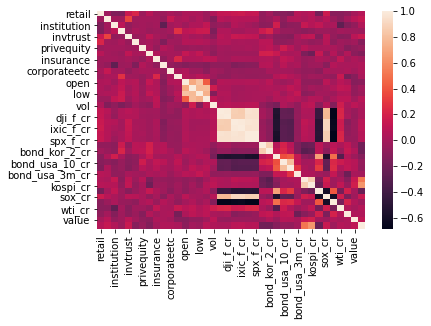

In [86]:
sns.heatmap(df.corr(method='pearson'))

In [87]:
df.corr(method='pearson')

,retail,foreigner,institution,financial,invtrust,pension,privequity,bank,insurance,financeetc,...,bond_usa_3m_cr,kosdaq_cr,kospi_cr,krw_cr,sox_cr,vix_cr,wti_cr,weekday,value,close_cr
retail,1.000000,-0.022217,-0.134605,-0.146750,0.145517,0.220997,-0.030660,0.073643,-0.015997,-0.028954,...,0.077333,0.049305,0.076525,-0.181589,0.161240,-0.099541,-0.100291,-0.077760,0.006782,0.066089
foreigner,-0.022217,1.000000,-0.003717,-0.007539,0.338482,-0.009088,-0.000170,-0.003537,-0.002333,-0.059648,...,0.055321,0.028123,0.071155,0.002675,0.078338,-0.038679,-0.095820,0.004221,0.079279,0.136585
institution,-0.134605,-0.003717,1.000000,0.096597,-0.065272,-0.015789,-0.000372,-0.016124,-0.000906,-0.265591,...,-0.075403,0.136508,0.071172,0.113560,0.020292,0.030194,-0.268801,-0.119776,-0.064611,0.058802
financial,-0.146750,-0.007539,0.096597,1.000000,-0.047458,0.025390,-0.000322,-0.036082,-0.015576,-0.030480,...,-0.071728,-0.094463,-0.069562,-0.028431,-0.027054,-0.041605,-0.003349,-0.016258,-0.015970,-0.027493
invtrust,0.145517,0.338482,-0.065272,-0.047458,1.000000,-0.042108,-0.020076,0.109700,0.012502,-0.017467,...,0.016332,0.101527,0.113870,-0.114518,0.090992,-0.058989,-0.108498,-0.097954,0.090718,0.146406
pension,0.220997,-0.009088,-0.015789,0.025390,-0.042108,1.000000,-0.006864,0.016138,-0.017740,-0.144477,...,-0.001260,-0.029135,-0.061406,-0.044737,0.076890,-0.083317,-0.018552,-0.033392,-0.011910,-0.112550
privequity,-0.030660,-0.000170,-0.000372,-0.000322,-0.020076,-0.006864,1.000000,0.031284,-0.052857,0.056218,...,-0.015073,0.075491,0.019142,0.017280,0.023294,0.021659,-0.018582,-0.118040,-0.075232,-0.049808
bank,0.073643,-0.003537,-0.016124,-0.036082,0.109700,0.016138,0.031284,1.000000,0.047266,-0.005145,...,0.038002,-0.144945,-0.207859,0.133601,-0.059242,0.063485,-0.060219,0.053687,-0.096688,-0.125500
insurance,-0.015997,-0.002333,-0.000906,-0.015576,0.012502,-0.017740,-0.052857,0.047266,1.000000,-0.069155,...,0.018530,-0.044854,-0.026432,0.037685,0.011998,-0.034305,0.117067,-0.009606,0.036564,0.000648
financeetc,-0.028954,-0.059648,-0.265591,-0.030480,-0.017467,-0.144477,0.056218,-0.005145,-0.069155,1.000000,...,0.038242,-0.055468,-0.020523,-0.014818,-0.100977,0.063510,0.020427,0.023515,0.020468,0.049214


<AxesSubplot:>

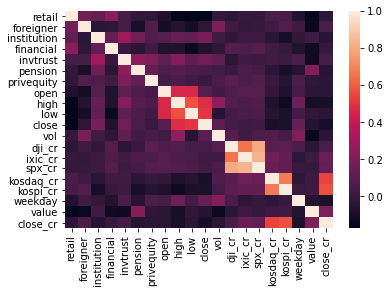

In [40]:
sns.heatmap(df.corr(method='kendall'))

<AxesSubplot:>

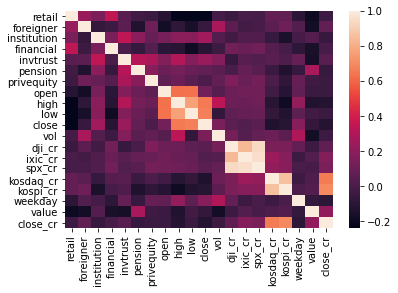

In [39]:
sns.heatmap(df.corr(method='spearman'))

In [42]:
df.corr(method='spearman')

,retail,foreigner,institution,financial,invtrust,pension,privequity,open,high,low,close,vol,dji_cr,ixic_cr,spx_cr,kosdaq_cr,kospi_cr,weekday,value,close_cr
retail,1.000000,0.226644,0.146478,0.345355,0.050154,-0.024133,-0.036494,-0.113629,-0.230864,-0.238337,-0.236188,-0.015333,-0.045468,0.000505,-0.006839,0.077110,0.074095,-0.098024,-0.197805,-0.040802
foreigner,0.226644,1.000000,-0.067133,-0.036467,0.061308,-0.129897,0.112846,-0.176611,-0.085167,-0.159587,-0.054885,0.278543,0.059986,-0.020166,-0.006118,0.054059,0.111875,0.023985,-0.177966,0.073213
institution,0.146478,-0.067133,1.000000,0.145540,0.346050,0.193165,0.086843,0.136577,0.187863,0.183104,0.258531,0.030471,-0.024806,0.021275,0.020085,-0.062165,-0.149998,-0.015549,0.029177,-0.057586
financial,0.345355,-0.036467,0.145540,1.000000,0.006424,-0.061137,0.033492,-0.098175,-0.103021,-0.191395,-0.103660,-0.035448,0.117884,0.098184,0.118596,0.040624,-0.007786,-0.092815,-0.153158,-0.002026
invtrust,0.050154,0.061308,0.346050,0.006424,1.000000,0.316746,0.279399,0.169984,0.306479,0.168532,0.238461,0.172996,-0.057497,0.048609,0.023679,0.042247,0.017425,0.081539,-0.162116,0.048326
pension,-0.024133,-0.129897,0.193165,-0.061137,0.316746,1.000000,0.183617,0.100965,0.127487,0.097402,0.075735,0.054771,-0.000063,0.082422,0.051482,-0.048217,-0.132136,-0.060339,0.275620,-0.060480
privequity,-0.036494,0.112846,0.086843,0.033492,0.279399,0.183617,1.000000,0.064055,0.100748,0.054418,0.009992,0.074860,0.158804,0.093865,0.125449,0.010211,-0.079221,0.087168,-0.031614,-0.049484
open,-0.113629,-0.176611,0.136577,-0.098175,0.169984,0.100965,0.064055,1.000000,0.628181,0.633700,0.129007,0.038524,0.103690,0.122557,0.124081,-0.028653,-0.114387,0.074643,-0.045061,-0.046591
high,-0.230864,-0.085167,0.187863,-0.103021,0.306479,0.127487,0.100748,0.628181,1.000000,0.764419,0.652853,0.336107,0.103942,0.095853,0.108903,-0.112258,-0.192417,0.219547,-0.130954,-0.118937
low,-0.238337,-0.159587,0.183104,-0.191395,0.168532,0.097402,0.054418,0.633700,0.764419,1.000000,0.668706,-0.071131,0.065287,0.085806,0.094446,-0.071560,-0.126142,0.062640,-0.023661,-0.045435


In [73]:
rand_num = 42
train_input, test_input, train_target, test_target = train_test_split(data, target, test_size=0.2, random_state=rand_num, stratify=target)

In [74]:
sts = StandardScaler()
sts.fit(train_input)
train_scaled = sts.transform(train_input)
test_scaled = sts.transform(test_input)

훈련세트가 2만이 넘는다면 훈련세트로만 전체를 사용하고 val set는 없어도 되고, 데이터가 충분히 많다면 val set는 5~ 10%만 지정해서 사용해도 됨

In [75]:
print(train_input.shape, test_input.shape)

(126, 36) (32, 36)


In [76]:
dt = DecisionTreeClassifier(random_state=rand_num)
dt.fit(train_scaled, train_target)

DecisionTreeClassifier(random_state=42)

In [77]:
train_score = dt.score(train_scaled, train_target)
test_score = dt.score(test_scaled, test_target)
print('train_score : {} \ntest_score : {}'.format(train_score, test_score))

train_score : 1.0 
test_score : 0.78125


## 교차 검증 <br>
ML에서는 샘플수가 충분히 많지 않기 때문에 교차검증을 시행하여 최적의 파마미터을 찾게 되지만, 딥러닝에서는 샘플 수가 충분하여 교차검증을 하지 않고, 훈련세트와 검증세트로만 나누어 사용함 <br>
따라서, tensorflow, keras같은 경우는 gridsearchcv와 같은 기능이 그렇게 많지 않음. tensorflow, keras는 데이터을 읽어들이는 도구들이 많이 발달되어 있음.

In [78]:
from sklearn.model_selection import cross_validate

In [79]:
dt = DecisionTreeClassifier(random_state=rand_num)

In [80]:
scores = cross_validate(dt,
                        X = train_scaled, y=train_target,
                        cv=10, n_jobs=multiprocessing.cpu_count(),
                        verbose=1)

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   6 out of  10 | elapsed:    2.4s remaining:    1.6s
[Parallel(n_jobs=8)]: Done  10 out of  10 | elapsed:    2.4s finished


In [81]:
scores

{'fit_time': array([0.00199509, 0.00199509, 0.00199556, 0.00498772, 0.00199556,
        0.00199437, 0.00199437, 0.00199556, 0.00299215, 0.00398946]),
 'score_time': array([0.00099754, 0.        , 0.00099683, 0.00099683, 0.00099683,
        0.        , 0.        , 0.00099683, 0.00099707, 0.        ]),
 'test_score': array([0.61538462, 0.61538462, 0.61538462, 0.53846154, 0.61538462,
        0.69230769, 0.58333333, 0.83333333, 0.66666667, 0.83333333])}

In [82]:
print("test score : {} (+/- {}".format(scores['test_score'].mean(), scores['test_score'].std()))

test score : 0.660897435897436 (+/- 0.09475261051396446


'# dt.score(test_input, test_target) <br>
cross_validate에서의 fit기능은 무엇인가? <br>
.fit는 언제하는가?

#### 분류기(splitter) 사용 <br>
클라스가 고르게 섞이게 하기 위하여 사용 <br>
회귀모델에서는 KFold() 객체, 분류모델에서는 StratifiedKFold() 사용 <br>
cross_validate method에서는 estimator에 따라 분류인지, 회귀인지를 확인하고, cv를 StratifiedKFlod()를 사용할지 KFold를 사용할 지 자동으로 결정하여 진행함.

In [83]:
from sklearn.model_selection import StratifiedKFold
scores = cross_validate(dt,
                        X = train_scaled, y=train_target,
                        cv=StratifiedKFold(10), 
                        n_jobs=multiprocessing.cpu_count(),
                        verbose=1)

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done  10 out of  10 | elapsed:    0.0s finished


In [84]:
print("test score : {} (+/- {}".format(scores['test_score'].mean(), scores['test_score'].std()))

test score : 0.660897435897436 (+/- 0.09475261051396446


위에서 cv=5를 적용한 cross_validate결과와 동일한 결과가 나옴.<br>
아래 splitter를 사용하여 상세하게 파라미터를 구성하여 사용

In [85]:
splitter = StratifiedKFold(n_splits=10, shuffle=True, random_state=rand_num)
scores = cross_validate(dt, train_scaled, train_target, cv=splitter)
print("test score : {} (+/- {}".format(scores['test_score'].mean(), scores['test_score'].std()))

test score : 0.6596153846153847 (+/- 0.09449205011278336


## 하이퍼파라미터 튜닝 <br>
최적의 파라미터를 찾기 위한 loop실행

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
params = {'min_impurity_decrease': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005]}

In [ ]:
# dt = DecisionTreeClassifier(random_state=42)
gs = GridSearchCV(DecisionTreeClassifier(random_state=42),
                  params,
                  n_jobs=-1) # -1:모든 cpu core를 사용
gs.fit(train_input, train_target)

In [ ]:
dt = gs.best_estimator_
dt_score = dt.score(train_input, train_target)
print('best estimator score: {}'.format(dt_score))

In [ ]:
print(gs.best_params_)

In [ ]:
for k, v in gs.cv_results_.items():
  if k == 'params':
    print('params')
    for k, v in params.items():
      print(k, v)
    continue
  print('{}: {}'.format(k, v))

In [ ]:
gs.cv_results_['mean_test_score']

In [ ]:
params = {'min_impurity_decrease': np.arange(0.0001, 0.001, 0.0001),
          'max_depth': range(5, 20, 1),
          'min_samples_split': range(2, 100, 10)
          }

In [ ]:
gs = GridSearchCV(DecisionTreeClassifier(random_state=42), params, n_jobs=-1)
gs.fit(train_input, train_target)

In [ ]:
print(gs.best_params_)

In [ ]:
print(np.max(gs.cv_results_['mean_test_score']))

### 랜덤 서치

In [ ]:
from scipy.stats import uniform, randint
# from numpy.random import uniform, randint # 기능은 같고 모양은 틀리나, 객체를 생성하지 못함.(아래 예 참조)

In [ ]:
rgen = randint(0, 10)
rgen.rvs(10)

In [ ]:
np.unique(rgen.rvs(1000), return_counts=True)

In [ ]:
ugen = uniform(0, 1)
ugen.rvs(10)

In [ ]:
params = {'min_impurity_decrease': uniform(0.0001, 0.001),
          'max_depth': randint(20, 50),
          'min_samples_split': randint(2, 25),
          'min_samples_leaf': randint(1, 25),
          }

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

gs = RandomizedSearchCV(DecisionTreeClassifier(random_state=42), params, 
                        n_iter=100, n_jobs=-1, random_state=42) #n_iter: params 의 임의변수를 100번 시행
gs.fit(train_input, train_target)

In [ ]:
print(gs.best_params_)

In [ ]:
print(np.max(gs.cv_results_['mean_test_score']))

In [ ]:
dt = gs.best_estimator_

print(dt.score(test_input, test_target))

## 확인문제

In [ ]:
gs = RandomizedSearchCV(DecisionTreeClassifier(splitter='random', random_state=42), params, 
                        n_iter=100, n_jobs=-1, random_state=42)
gs.fit(train_input, train_target)

In [ ]:
print(gs.best_params_)
print(np.max(gs.cv_results_['mean_test_score']))

dt = gs.best_estimator_
print(dt.score(test_input, test_target))

## random number generator

In [ ]:
sample_list = np.random.choice(15, 6, replace=False) # 중복허용하지 않음.

In [ ]:
aa = np.sort(sample_list)
aa

In [ ]:
for i in range(10):
    sample_list = np.random.choice(15, 6, replace=False)
    aa = np.sort(sample_list)
    print(aa)
    